<a href="https://colab.research.google.com/github/rafaelmt35/neuralnetwork2023/blob/main/Lab1_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорт**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, mean_squared_error, mean_absolute_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Бинарный Классификатор**

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Neural Network/diabetes_012_health_indicators_BRFSS2015.csv",sep=',')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df_cut = data[['Diabetes_012']]
df_cut.head(10)

,Diabetes_012
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,2.0
9,0.0


In [ ]:
class_names_dict = {0:'negative',1:'positive',2:'positive'}
data['ClassName'] = data['Diabetes_012'].map(class_names_dict)

In [ ]:
data.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ClassName
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,negative
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,negative
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,negative
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,negative
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,negative
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0,negative
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0,negative
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0,negative
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0,positive
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0,negative


In [ ]:
data[['ClassName','Diabetes_012']].head(10)

,ClassName,Diabetes_012
0,negative,0.0
1,negative,0.0
2,negative,0.0
3,negative,0.0
4,negative,0.0
5,negative,0.0
6,negative,0.0
7,negative,0.0
8,positive,2.0
9,negative,0.0


In [ ]:
binary_class = {'negative':0,'positive':1}
data['Target'] = data['ClassName'].map(binary_class)

In [ ]:
data[['ClassName','Target']].head(10)

,ClassName,Target
0,negative,0
1,negative,0
2,negative,0
3,negative,0
4,negative,0
5,negative,0
6,negative,0
7,negative,0
8,positive,1
9,negative,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
X = data.drop(['ClassName','Target'], axis=1)
y = data['Target']

In [ ]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)

In [ ]:
print(f'Размер исходного набора: {X.shape}')
print(f'Размер обучающего набора: {X_train.shape}')
print(f'Размер тестового набора: {X_val.shape}')

Размер исходного набора: (253680, 22)
Размер обучающего набора: (162355, 22)
Размер тестового набора: (40589, 22)


## **Использовать Logistic Regression**

In [ ]:
model = LogisticRegression(C=0.01)
model.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [ ]:
y_prediction = model.predict(X_test)

In [ ]:
y_test

235899    0
74852     1
8205      0
127632    1
32021     0
         ..
52177     0
94042     1
188075    0
16561     0
38201     0
Name: Target, Length: 50736, dtype: int64

In [ ]:
y_prediction

array([0, 1, 0, ..., 0, 0, 0])

### **Recall, Precision, Weighted Accuracy, & AUC**

In [ ]:
recall = "{:.2f}".format(recall_score(y_test, y_prediction, average='weighted'))
precision = "{:.2f}".format(precision_score(y_test, y_prediction, average='weighted'))
weighted_accuracy = "{:.2f}".format(accuracy_score(y_test, y_prediction))
auc = "{:.2f}".format(roc_auc_score(y_test, y_prediction))

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Weighted Accuracy: {weighted_accuracy}")
print(f"AUC: {auc}")

Recall: 1.00
Precision: 1.00
Weighted Accuracy: 1.00
AUC: 0.99


## **Использовать Tensorflow**

In [ ]:
binary_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu',input_dim=22),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
binary_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 92        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
binary_model.compile(loss='binary_crossentropy',
                     optimizer='adam',
                      metrics='accuracy')

In [ ]:
binary_model_history = binary_model.fit(X_train, y_train,
                      validation_data=(X_val,y_val),
                      batch_size=100, epochs=3)

Epoch 1/3
1624/1624 [==============================] - 4s 2ms/step - loss: 0.1823 - accuracy: 0.9305 - val_loss: 0.0802 - val_accuracy: 0.9821
Epoch 2/3
1624/1624 [==============================] - 5s 3ms/step - loss: 0.0490 - accuracy: 0.9917 - val_loss: 0.0272 - val_accuracy: 0.9996
Epoch 3/3
1624/1624 [==============================] - 4s 2ms/step - loss: 0.0169 - accuracy: 0.9999 - val_loss: 0.0101 - val_accuracy: 1.0000


### **Recall, Precision, Weighted Accuracy, & AUC**

In [ ]:
y_prob = binary_model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
weighted_accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Weighted Accuracy: {weighted_accuracy:.2f}")
print(f"AUC: {auc:.2f}")

1586/1586 [==============================] - 2s 1ms/step
Recall: 1.00
Precision: 1.00
Weighted Accuracy: 1.00
AUC: 1.00


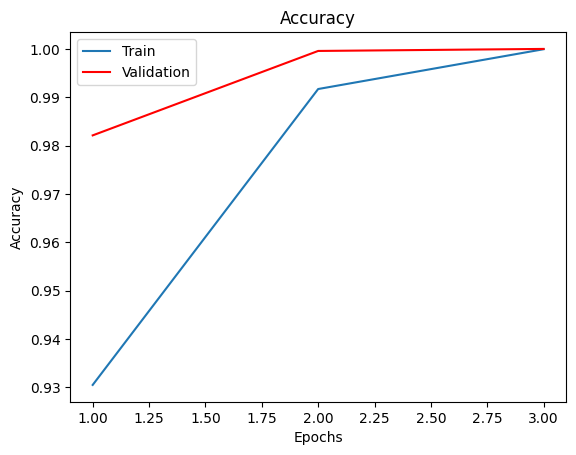

In [ ]:
acc = binary_model_history.history['accuracy']
val_acc = binary_model_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy')
plt.plot(epochs,acc,label='Train')
plt.plot(epochs,val_acc,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

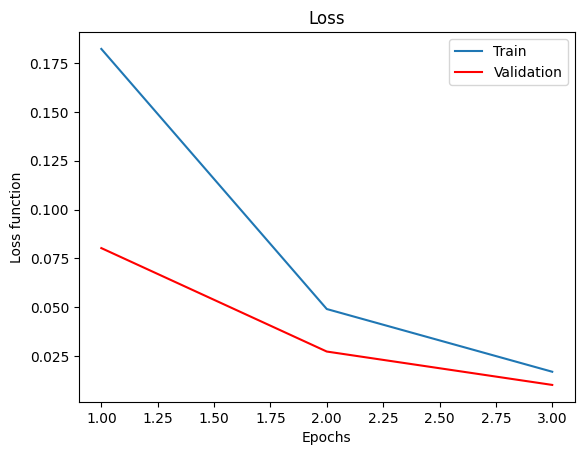

In [ ]:
loss_function = binary_model_history.history['loss']
val_loss_function = binary_model_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss')
plt.plot(epochs,loss_function,label='Train')
plt.plot(epochs,val_loss_function,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

# **Многоклассовый классификатор**

In [3]:
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Neural Network/bodyPerformance.csv",sep=',')
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
data[['class']].head(10)

,class
0,C
1,A
2,C
3,B
4,B
5,B
6,D
7,B
8,C
9,B


In [6]:
multi_class = {'A':1,'B':2, 'C':3, 'D':4}
data['Target'] = data['class'].map(multi_class)

In [7]:
data[['class','Target']].head(10)

,class,Target
0,C,3
1,A,1
2,C,3
3,B,2
4,B,2
5,B,2
6,D,4
7,B,2
8,C,3
9,B,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
 12  Target                   13393 non-null  int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 1.3+ MB


In [9]:
X = data.drop(['gender','class', 'Target'],axis=1)
y = data[['Target']]

In [10]:
X = data.drop(['gender','class'],axis=1)
y = data[['class']]

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   height_cm                13393 non-null  float64
 2   weight_kg                13393 non-null  float64
 3   body fat_%               13393 non-null  float64
 4   diastolic                13393 non-null  float64
 5   systolic                 13393 non-null  float64
 6   gripForce                13393 non-null  float64
 7   sit and bend forward_cm  13393 non-null  float64
 8   sit-ups counts           13393 non-null  float64
 9   broad jump_cm            13393 non-null  float64
 10  Target                   13393 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.1 MB


In [12]:
y.info

<bound method DataFrame.info of       class
0         C
1         A
2         C
3         B
4         B
...     ...
13388     C
13389     D
13390     A
13391     D
13392     C

[13393 rows x 1 columns]>

In [13]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)

In [16]:
print(f'Размер исходного набора: {X.shape}')
print(f'Размер обучающего набора: {X_train.shape}')
print(f'Размер тестового набора: {X_test.shape}')

Размер исходного набора: (13393, 11)
Размер обучающего набора: (8571, 11)
Размер тестового набора: (2679, 11)


In [17]:
print(f'Размер исходного набора: {y.shape}')
print(f'Размер обучающего набора: {y_train.shape}')
print(f'Размер тестового набора: {y_test.shape}')

Размер исходного набора: (13393, 1)
Размер обучающего набора: (8571, 1)
Размер тестового набора: (2679, 1)


## **Использовать Support Vector Machine**

In [18]:
model_svm = SVC(kernel='linear', C=1.0, probability=True, decision_function_shape='ovr')
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', probability=True)

In [19]:
y_pred = model_svm.predict(X_test)

### **Recall, Precision, & Weighted Accuracy**

In [ ]:
recall = "{:.2f}".format(recall_score(y_test, y_pred, average='weighted'))
precision = "{:.2f}".format(precision_score(y_test, y_pred, average='weighted'))
weighted_accuracy = "{:.2f}".format(accuracy_score(y_test, y_pred))

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Weighted Accuracy: {weighted_accuracy}")

Recall: 0.59
Precision: 0.59
Weighted Accuracy: 0.59


In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(2679, 4)

In [ ]:
label_encoder = LabelEncoder()
y_prediction_encoded = label_encoder.fit_transform(y_pred)

### **AUC for Class A**

In [ ]:
label_binarizer.transform(["A"])

array([[1, 0, 0, 0]])

In [ ]:
class_of_interest = "A"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

In [ ]:
auc_score_a = roc_auc_score(y_onehot_test[:, class_id], y_prediction_encoded)

In [ ]:
print(f"AUC Class A: {auc_score_a:.2f}")

AUC Class A: 0.13


### **AUC for Class B**

In [ ]:
label_binarizer.transform(["B"])

array([[0, 1, 0, 0]])

In [ ]:
class_of_interest = "B"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

In [ ]:
auc_score_b = roc_auc_score(y_onehot_test[:, class_id], y_prediction_encoded)

In [ ]:
print(f"AUC Class B: {auc_score_b:.2f}")

AUC Class B: 0.37


### **AUC for Class C**

In [ ]:
label_binarizer.transform(["C"])

array([[0, 0, 1, 0]])

In [ ]:
class_of_interest = "C"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

In [ ]:
auc_score_c = roc_auc_score(y_onehot_test[:, class_id], y_prediction_encoded)

In [ ]:
print(f"AUC Class C: {auc_score_c:.2f}")

AUC Class C: 0.59


### **AUC for Class D**

In [ ]:
label_binarizer.transform(["D"])

array([[0, 0, 0, 1]])

In [ ]:
class_of_interest = "D"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

3

In [ ]:
auc_score_d = roc_auc_score(y_onehot_test[:, class_id], y_prediction_encoded)

In [ ]:
print(f"AUC Class D: {auc_score_d:.2f}")

AUC Class D: 0.89


### **All AUC Score**

In [ ]:
print(f"AUC Class A: {auc_score_a:.2f}")
print(f"AUC Class B: {auc_score_b:.2f}")
print(f"AUC Class C: {auc_score_c:.2f}")
print(f"AUC Class D: {auc_score_d:.2f}")

AUC Class A: 0.13
AUC Class B: 0.37
AUC Class C: 0.59
AUC Class D: 0.89


## **Использовать Random Forest Classifier**

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model_rf.predict(X_test)

### **Recall, Precision, & Weighted Accuracy**

In [ ]:
recall = "{:.2f}".format(recall_score(y_test, y_pred, average='weighted'))
precision = "{:.2f}".format(precision_score(y_test, y_pred, average='weighted'))
weighted_accuracy = "{:.2f}".format(accuracy_score(y_test, y_pred))

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Weighted Accuracy: {weighted_accuracy}")

Recall: 0.73
Precision: 0.74
Weighted Accuracy: 0.73


In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(2679, 4)

In [ ]:
label_encoder = LabelEncoder()
y_prediction_encoded = label_encoder.fit_transform(y_pred)

### **AUC for Class A**


In [ ]:
label_binarizer.transform(["A"])

array([[1, 0, 0, 0]])

In [ ]:
class_of_interest = "A"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

In [ ]:
auc_score_a = roc_auc_score(y_onehot_test[:, class_id], y_prediction_encoded)

In [ ]:
print(f"AUC Class A: {auc_score_a:.2f}")

AUC Class A: 0.09


#### **ROC for Class A**


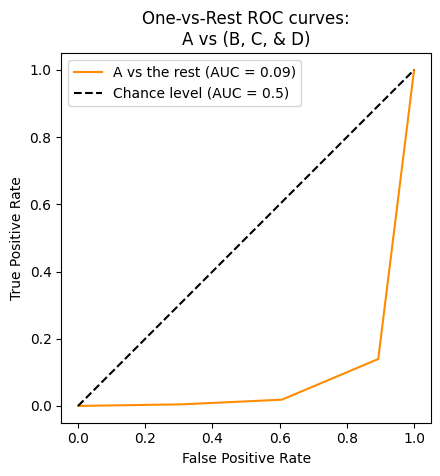

In [ ]:
roc_display_A = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_prediction_encoded,
    name=f"{class_of_interest} vs the rest",
    plot_chance_level=True,
    color="darkorange"
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nA vs (B, C, & D)")
plt.legend()
plt.show()

### **AUC for Class B**


In [ ]:
label_binarizer.transform(["B"])

array([[0, 1, 0, 0]])

In [ ]:
class_of_interest = "B"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

In [ ]:
auc_score_b = roc_auc_score(y_onehot_test[:, class_id], y_prediction_encoded)

In [ ]:
print(f"AUC Class B: {auc_score_b:.2f}")

AUC Class B: 0.36


#### **ROC for Class B**


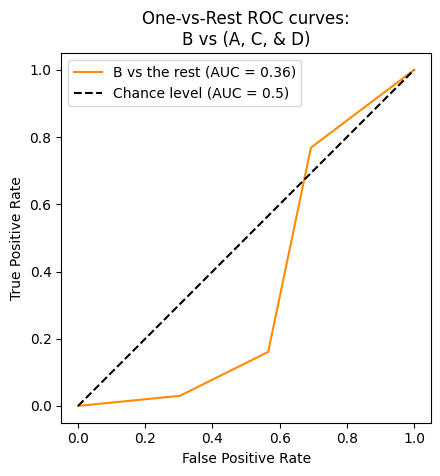

In [ ]:
roc_display_B = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_prediction_encoded,
    name=f"{class_of_interest} vs the rest",
    plot_chance_level=True,
    color="darkorange"
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nB vs (A, C, & D)")
plt.legend()
plt.show()

### **AUC for Class C**


In [ ]:
label_binarizer.transform(["C"])

array([[0, 0, 1, 0]])

In [ ]:
class_of_interest = "C"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

In [ ]:
auc_score_c = roc_auc_score(y_onehot_test[:, class_id], y_prediction_encoded)

In [ ]:
print(f"AUC Class C: {auc_score_c:.2f}")

AUC Class C: 0.60


#### **ROC for Class C**


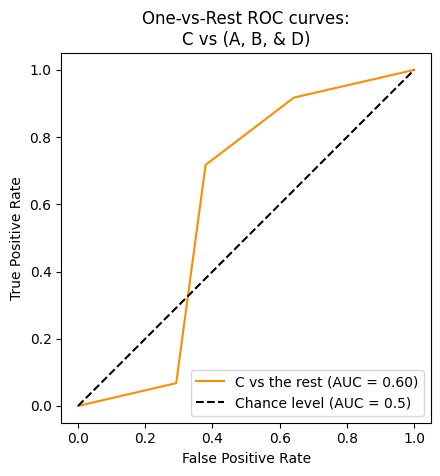

In [ ]:
roc_display_C = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_prediction_encoded,
    name=f"{class_of_interest} vs the rest",
    plot_chance_level=True,
    color="darkorange"
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nC vs (A, B, & D)")
plt.legend()
plt.show()

### **AUC for Class D**


In [ ]:
label_binarizer.transform(["D"])

array([[0, 0, 0, 1]])

In [ ]:
class_of_interest = "D"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

3

In [ ]:
auc_score_d = roc_auc_score(y_onehot_test[:, class_id], y_prediction_encoded)

In [ ]:
print(f"AUC Class D: {auc_score_d:.2f}")

AUC Class D: 0.93


#### **ROC for Class D**


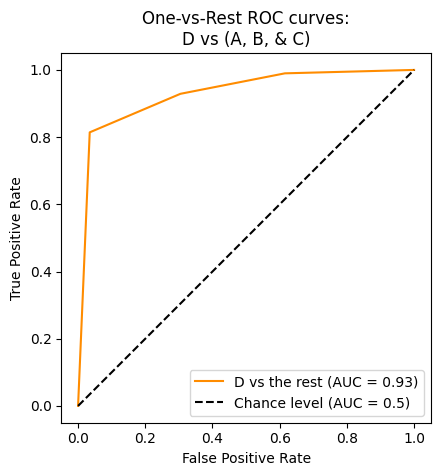

In [ ]:
roc_display_D = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_prediction_encoded,
    name=f"{class_of_interest} vs the rest",
    plot_chance_level=True,
    color="darkorange"
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nD vs (A, B, & C)")
plt.legend()
plt.show()

### **All AUC Score**

In [ ]:
print(f"AUC Class A: {auc_score_a:.2f}")
print(f"AUC Class B: {auc_score_b:.2f}")
print(f"AUC Class C: {auc_score_c:.2f}")
print(f"AUC Class D: {auc_score_d:.2f}")

AUC Class A: 0.09
AUC Class B: 0.36
AUC Class C: 0.60
AUC Class D: 0.93


## **Использовать Decision Tree Classifier**

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=6)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_prediction = model_dt.predict(X_test)

### **Recall, Precision, & Weighted Accuracy**

In [ ]:
recall = "{:.2f}".format(recall_score(y_test, y_prediction, average='weighted'))
precision = "{:.2f}".format(precision_score(y_test, y_prediction, average='weighted'))
weighted_accuracy = "{:.2f}".format(accuracy_score(y_test, y_prediction))

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Weighted Accuracy: {weighted_accuracy}")

Recall: 0.62
Precision: 0.64
Weighted Accuracy: 0.62


In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(2679, 4)

In [ ]:
label_encoder = LabelEncoder()
y_prediction_encoded = label_encoder.fit_transform(y_prediction)

### **AUC for Class A**


In [ ]:
label_binarizer.transform(["A"])

array([[1, 0, 0, 0]])

In [ ]:
class_of_interest = "A"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

In [ ]:
auc_score_a = roc_auc_score(y_onehot_test[:, class_id], y_prediction_encoded)

In [ ]:
print(f"AUC Class A: {auc_score_a:.2f}")

AUC Class A: 0.13


### **AUC for Class B**

In [ ]:
label_binarizer.transform(["B"])

array([[0, 1, 0, 0]])

In [ ]:
class_of_interest = "B"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

In [ ]:
auc_score_b = roc_auc_score(y_onehot_test[:, class_id], y_prediction_encoded)

In [ ]:
print(f"AUC Class B: {auc_score_b:.2f}")

AUC Class B: 0.39


### **AUC for Class C**

In [ ]:
label_binarizer.transform(["C"])

array([[0, 0, 1, 0]])

In [ ]:
class_of_interest = "C"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

In [ ]:
auc_score_c = roc_auc_score(y_onehot_test[:, class_id], y_prediction_encoded)

In [ ]:
print(f"AUC Class C: {auc_score_c:.2f}")

AUC Class C: 0.57


### **AUC for Class D**

In [ ]:
label_binarizer.transform(["D"])

array([[0, 0, 0, 1]])

In [ ]:
class_of_interest = "D"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

3

In [ ]:
auc_score_d = roc_auc_score(y_onehot_test[:, class_id], y_prediction_encoded)

In [ ]:
print(f"AUC Class D: {auc_score_d:.2f}")

AUC Class D: 0.89


### **All AUC Score**

In [ ]:
print(f"AUC Class A: {auc_score_a:.2f}")
print(f"AUC Class B: {auc_score_b:.2f}")
print(f"AUC Class C: {auc_score_c:.2f}")
print(f"AUC Class D: {auc_score_d:.2f}")

AUC Class A: 0.13
AUC Class B: 0.39
AUC Class C: 0.57
AUC Class D: 0.89


## **Использовать Tensorflow**


In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
multi_class_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu',input_dim=10),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
multi_class_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                176       
                                                                 
 dense_8 (Dense)             (None, 5)                 85        
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
multi_class_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                      metrics='accuracy')

In [ ]:
multi_class_model_history = multi_class_model.fit(X_train, y_train,
                      validation_data=(X_val,y_val),
                      epochs=90)

Epoch 1/90
268/268 [==============================] - 1s 3ms/step - loss: 1.4519 - accuracy: 0.3164 - val_loss: 1.3609 - val_accuracy: 0.3882
Epoch 2/90
268/268 [==============================] - 1s 2ms/step - loss: 1.3278 - accuracy: 0.4136 - val_loss: 1.2923 - val_accuracy: 0.3868
Epoch 3/90
268/268 [==============================] - 1s 2ms/step - loss: 1.2595 - accuracy: 0.4278 - val_loss: 1.2216 - val_accuracy: 0.4615
Epoch 4/90
268/268 [==============================] - 1s 4ms/step - loss: 1.1972 - accuracy: 0.4645 - val_loss: 1.1632 - val_accuracy: 0.4876
Epoch 5/90
268/268 [==============================] - 1s 3ms/step - loss: 1.1466 - accuracy: 0.4837 - val_loss: 1.1176 - val_accuracy: 0.4872
Epoch 6/90
268/268 [==============================] - 1s 3ms/step - loss: 1.1102 - accuracy: 0.4989 - val_loss: 1.0860 - val_accuracy: 0.4960
Epoch 7/90
268/268 [==============================] - 1s 4ms/step - loss: 1.0857 - accuracy: 0.5062 - val_loss: 1.0625 - val_accuracy: 0.5161
Epoch 

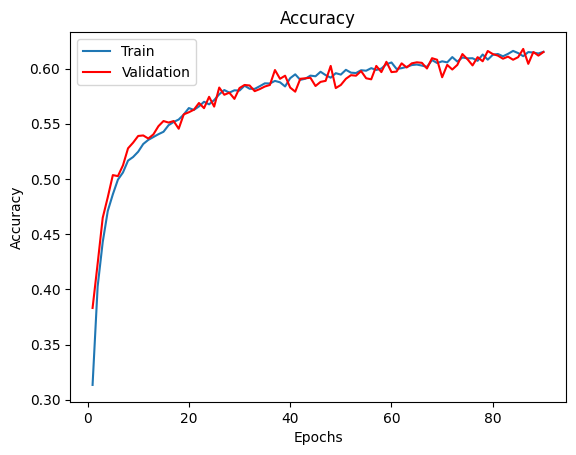

In [ ]:
acc = multi_class_model_history.history['accuracy']
val_acc = multi_class_model_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy')
plt.plot(epochs,acc,label='Train')
plt.plot(epochs,val_acc,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

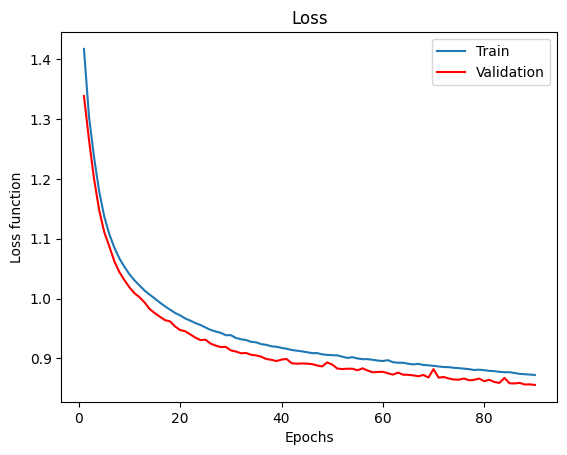

In [ ]:
loss_function = multi_class_model_history.history['loss']
val_loss_function = multi_class_model_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss')
plt.plot(epochs,loss_function,label='Train')
plt.plot(epochs,val_loss_function,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

# **Регрессор**

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Neural Network/DS_2019_public.csv", encoding='latin-1')
df.head()

<ipython-input-168-b63d7004b45f>:1: DtypeWarning: Columns (30,56,96,114) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Neural Network/DS_2019_public.csv", encoding='latin-1')


,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793,17,181.998,620.979,621,368,38606,...,-2,30110,2,120.893,121,4,0,1,1,1310.220
1,1,1,1,48.901,49,184.459,629.389,629,582,40248,...,2,7933,-2,242.746,243,2,0,1,-2,915.664
2,1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,...,-2,6440,5,158.797,159,7,0,1,5,1670.534
3,1,1,1,0,0,0.000,0.000,0,616,36136,...,2,13884,5,85.138,85,5,0,1,5,346.468
4,1,4,10,45.132,45,274.530,936.677,937,685,74100,...,3,14204,6,151.319,151,6,0,1,5,920.454


In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Data columns (total 121 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    Climate_Region_Pub  10875 non-null  int64  
 1    DIVISION            10875 non-null  int64  
 2    REPORTABLE_DOMAIN   10875 non-null  int64  
 3    DOLELCOL            10875 non-null  object 
 4    TOTALDOLCOL         10875 non-null  int64  
 5    KWHCOL              10875 non-null  float64
 6    BTUELCOL            10875 non-null  float64
 7    TOTALBTUCOL         10875 non-null  int64  
 8    TOTALDOLSPH         10875 non-null  int64  
 9    TOTALBTUSPH         10875 non-null  int64  
 10   CELLAR              10875 non-null  int64  
 11   NWEIGHT             10875 non-null  float64
 12   TOTHSQFT            10875 non-null  int64  
 13   HEATHOME            10875 non-null  int64  
 14   NUMPC               10875 non-null  int64  
 15   DOLLAREL            10875 non-null

In [ ]:
x = df.drop(columns=["DOLELCOL","DOLFOSPH", "DOLELSPH" ,"DOLNGWTH" ,"CUFEETNGOTH" , "KWHOTH" , "CUFEETNGWTH", "DOLELRFG"], axis=1)
y = df[["TOTALDOL"]]

In [ ]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [ ]:
print(f'Размер исходного набора: {X.shape}')
print(f'Размер обучающего набора: {X_train.shape}')
print(f'Размер тестового набора: {X_val.shape}')

Размер исходного набора: (10875, 113)
Размер обучающего набора: (6960, 113)
Размер тестового набора: (1740, 113)


## **Использовать Tensorflow**

In [ ]:
regressor_res = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu',input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
regressor_res.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                1824      
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1969 (7.69 KB)
Trainable params: 1969 (7.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
regressor_res.compile(loss='mse',
                      optimizer='adam',
                      metrics='mae')

In [ ]:
regressor_history = regressor_res.fit(X_train, y_train,
                      validation_data=(X_val,y_val), batch_size = 40, epochs=400)

Epoch 1/400
174/174 [==============================] - 4s 6ms/step - loss: 5560189.0000 - mae: 2027.9348 - val_loss: 5347220.5000 - val_mae: 2022.7343
Epoch 2/400
174/174 [==============================] - 1s 5ms/step - loss: 5013115.0000 - mae: 1895.6118 - val_loss: 4323825.0000 - val_mae: 1767.6987
Epoch 3/400
174/174 [==============================] - 1s 5ms/step - loss: 3559893.7500 - mae: 1491.9435 - val_loss: 2534941.5000 - val_mae: 1221.6650
Epoch 4/400
174/174 [==============================] - 1s 5ms/step - loss: 1918561.7500 - mae: 939.1122 - val_loss: 1234889.1250 - val_mae: 759.8793
Epoch 5/400
174/174 [==============================] - 1s 5ms/step - loss: 1149588.2500 - mae: 693.0259 - val_loss: 904436.4375 - val_mae: 685.9096
Epoch 6/400
174/174 [==============================] - 1s 5ms/step - loss: 1010921.8125 - mae: 681.6803 - val_loss: 860587.7500 - val_mae: 688.9051
Epoch 7/400
174/174 [==============================] - 1s 6ms/step - loss: 976712.5625 - mae: 680.0615

### **MSE, MAE, & R2**

In [ ]:
y_pred = regressor_res.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

68/68 [==============================] - 0s 2ms/step
MSE: 101.62
MAE: 6.53
R-squared (R^2): 1.00


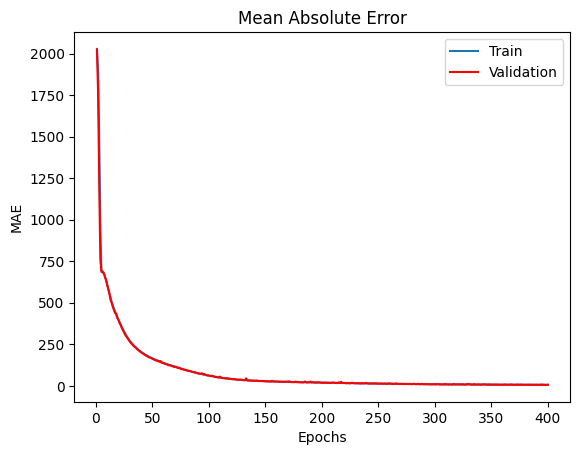

In [ ]:
mae = regressor_history.history['mae']
val_mae = regressor_history.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Mean Absolute Error')
plt.plot(epochs,mae,label='Train')
plt.plot(epochs,val_mae,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

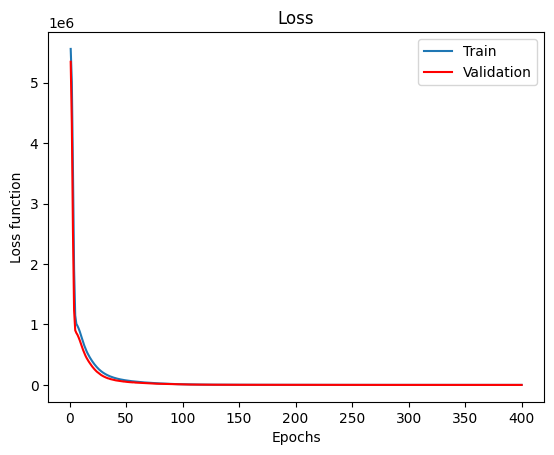

In [ ]:
loss_function = regressor_history.history['loss']
val_loss_function = regressor_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss')
plt.plot(epochs,loss_function,label='Train')
plt.plot(epochs,val_loss_function,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()